## Este exercicio consiste em predicao de valores para venda de casas

Os dados contém as seguintes colunas:

- 'Avg. Area Income': Média da renda dos residentes de onde a casa está localizada.
- 'Avg. Area House Age': Média de idade das casas da mesma cidade.
- 'Avg. Area Number of Rooms': Número médio de cômodos para casas na mesma cidade.
- 'Avg. Area Number of Bedrooms': Número médio de quartos para casas na mesma cidade
- 'Area Population': A população da cidade onde a casa está localizada.
- 'Price': Preço de venda da casa.
- 'Address': Endereço da casa;

Importe os dados house.csv

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [38]:
df = pd.read_csv('house.csv')

## Qual o head do dataframe

In [39]:
df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  
0                          4.09     23086.800503  1.059034e+06  
1                          3.09     40173.072174  1.505891e+06  
2                          5.13     36882.159400  1.058988e+06  
3                          3.26     34310.242831  1.260617e+06  
4                          4.23     26354.109472  6.309435e+05

### Faca um sns.pairplot(df) e identifique se há linearidade aparente na variavel Price

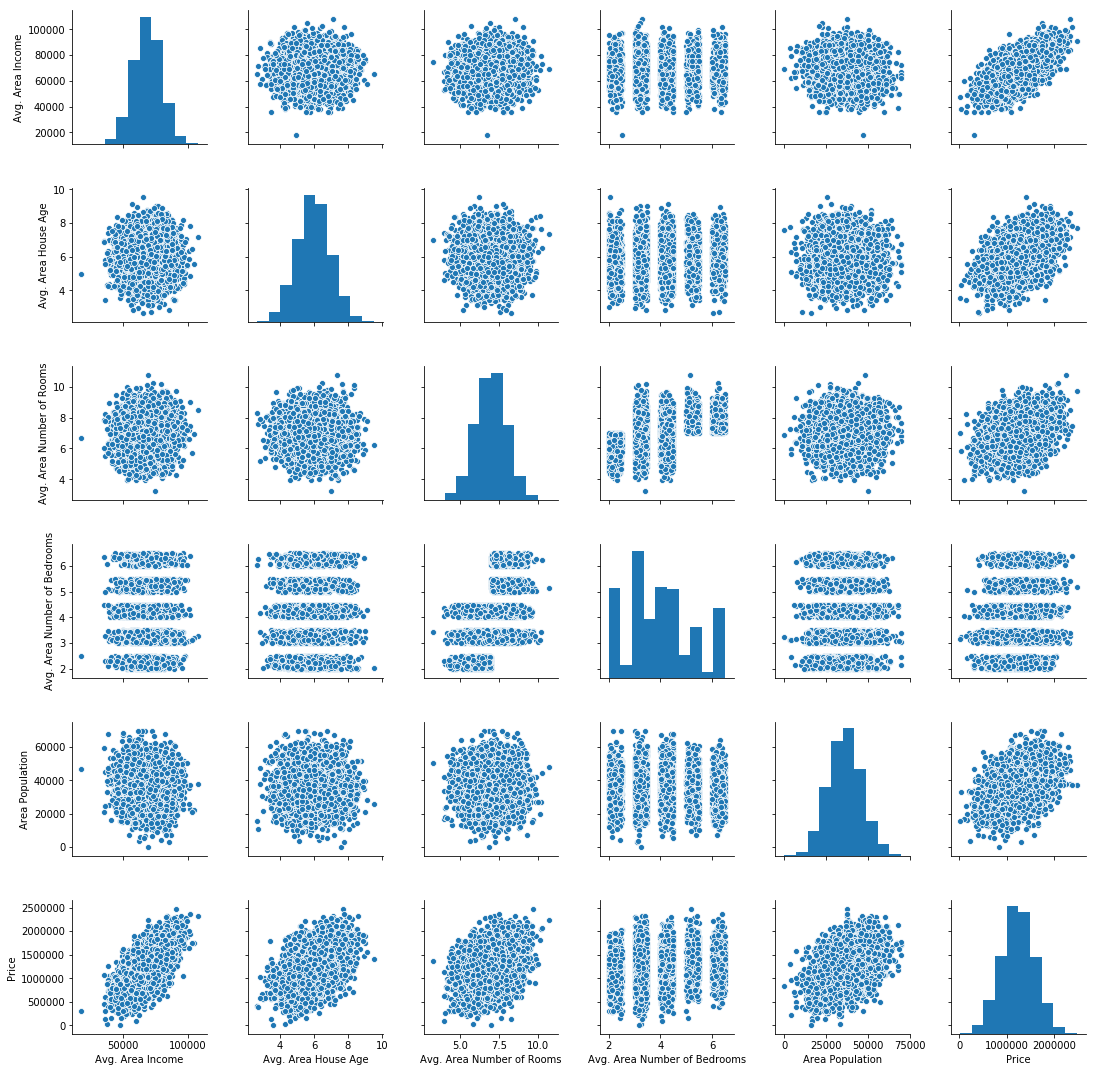

In [40]:
sns.pairplot(df)

### Faca um sns.distplot(df['Price']) e avalie se este segue uma distribuicao normal

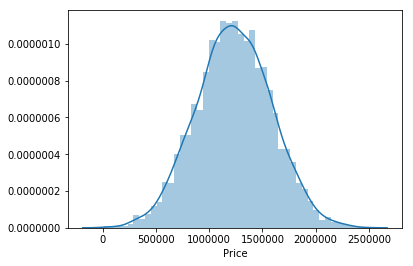

In [41]:
sns.distplot(df['Price'])

###  Faca correlacao entre as veriaveis e o target (preco)

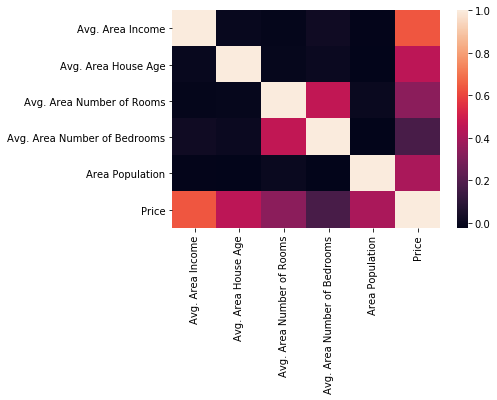

In [42]:
sns.heatmap(df.corr())

### Explore os dados, media, desvio padrao, mediana, correlacao

### Separe as variaveis em target (y) e em Features (X)

In [14]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

### Utilize train_test_split para separar os dados em treino e teste

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Treine um modelo de Regressao Linear para predizer o preço das casas

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Analise os coeficientes do modelo

In [36]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])  
coeff_df

Coefficient
Avg. Area Income                  21.625799
Avg. Area House Age           165590.392746
Avg. Area Number of Rooms     119827.783390
Avg. Area Number of Bedrooms    2361.095262
Area Population                   15.216581

### Faca a previsao do X_test

In [20]:
y_pred = lm.predict(X_test)

### Plot a diferenca entre o real e o predito de 50 observacoes

In [33]:
df_erro = pd.DataFrame({'Real': y_test, 'Predito': y_pred})
df1 = df_erro.head(50)

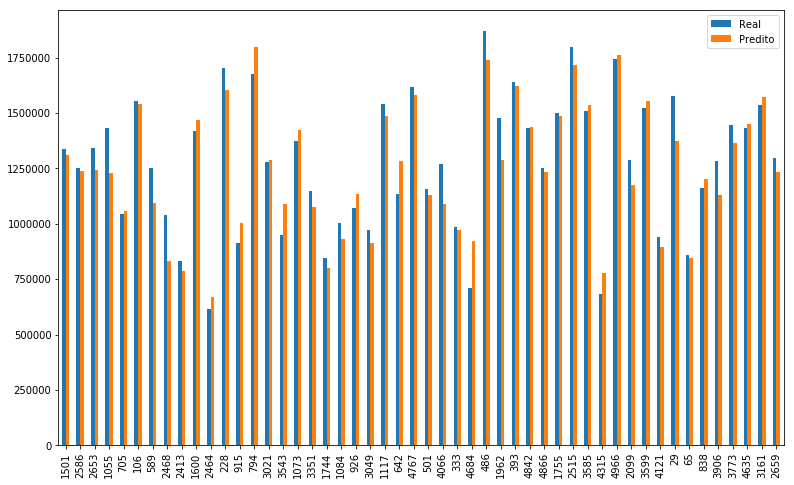

In [34]:
df1.plot(kind='bar',figsize=(13,8))
plt.show()

###  Print o MAE , MSE e RMSE

In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 81135.56609336883
Mean Squared Error: 10068422551.400854
Root Mean Squared Error: 100341.52954485423


/home/pc/projects/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


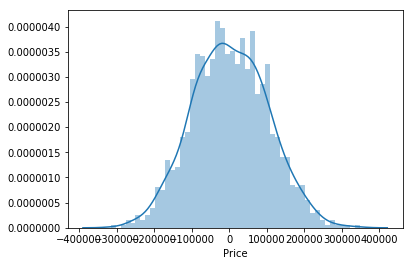

In [35]:
sns.distplot((y_test-y_pred),bins=50)